In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [29]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

In [30]:
car_MPG = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [31]:
car_MPG.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [32]:
df = pd.DataFrame(data=car_MPG, columns=car_MPG.columns)

In [33]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [34]:
df.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Origin'],
      dtype='object')

In [35]:
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [36]:
df['Horsepower'] = df['Horsepower'].fillna(df['Horsepower'].mean())

In [37]:
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [38]:
df.shape

(398, 8)

In [39]:
X=df.iloc[:, 0:8]
X.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [40]:
X=df.drop('MPG', axis=1)
X.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,8,307.0,130.0,3504.0,12.0,70,1
1,8,350.0,165.0,3693.0,11.5,70,1
2,8,318.0,150.0,3436.0,11.0,70,1
3,8,304.0,150.0,3433.0,12.0,70,1
4,8,302.0,140.0,3449.0,10.5,70,1


In [41]:
y=df.iloc[:, 0]
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: MPG, dtype: float64

In [42]:
X = X.to_numpy()

In [43]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [46]:
X.shape

(398, 7, 1)

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [48]:
n_steps = X.shape[1]
n_steps

7

In [50]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.optimizers import Adam

def build_model(): 
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])
    
    return model

model = build_model() 
print("input_shape => ", n_steps, n_features)
model.summary()

input_shape =>  7 1
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 6, 64)             192       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 3, 64)            0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 192)               0         
                                                                 
 dense_3 (Dense)             (None, 50)                9650      
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                  

In [51]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
10/10 [==============================] - 1s 39ms/step - loss: 14602.1035 - mse: 14602.1035 - val_loss: 180.9344 - val_mse: 180.9344
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 167.8925 - mse: 167.8925 - val_loss: 190.7711 - val_mse: 190.7711
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 193.2123 - mse: 193.2123 - val_loss: 586.1100 - val_mse: 586.1100
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 1157.8401 - mse: 1157.8401 - val_loss: 398.8073 - val_mse: 398.8073
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 432.6860 - mse: 432.6860 - val_loss: 2559.6064 - val_mse: 2559.6064
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 820.2413 - mse: 820.2413 - val_loss: 418.6393 - val_mse: 418.6393
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 949.3412 - mse: 949.3412 - val_loss: 185.0466 - val_mse: 185.0466
Epoch 8/100
10/10 

In [52]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 29.1059 - mse: 29.1059


[29.10586166381836, 29.10586166381836]

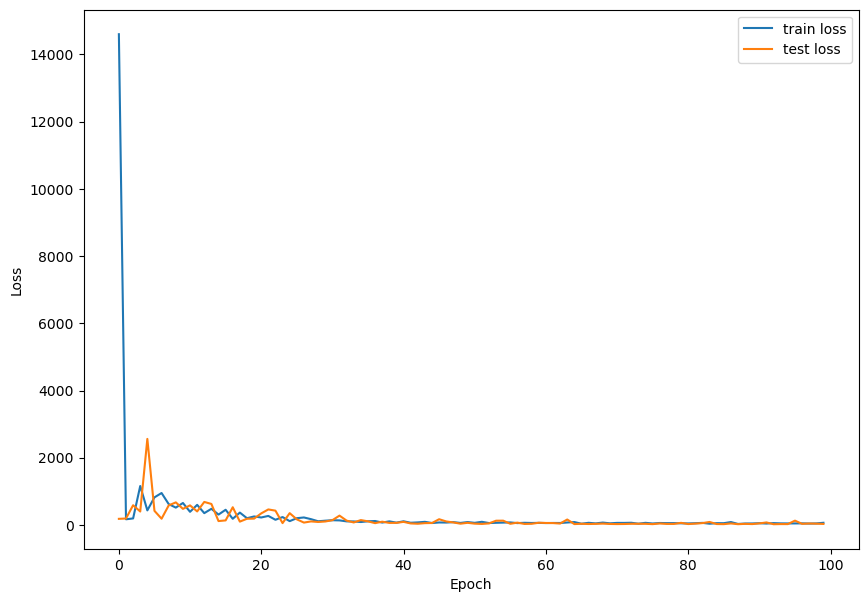

In [53]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

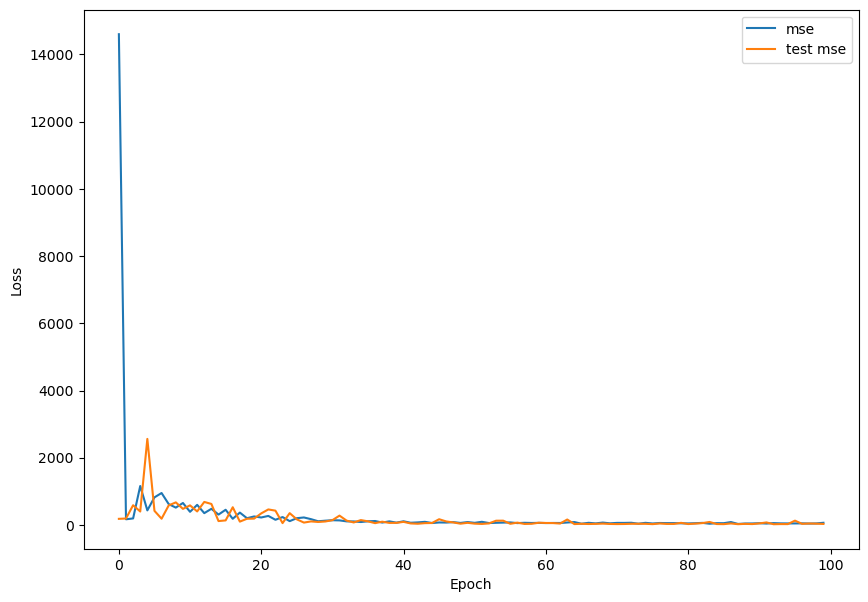

In [54]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mse'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mse'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()